In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
import pretty_midi as midi

ms.use('seaborn-muted')         # fancy plot designs

In [2]:
# Project from 

In [3]:
N = ['C', 'D', 'E', 'F', 'G', 'A', 'B']

In [4]:
def get_note(start_note, oc):
    pitch = []
    pt = N.index(start_note)
    note = N[pt] + str(oc)
    while True:
        pitch.append(midi.note_name_to_number(note))
        pt = (pt + 1) % len(N)
        if (pt == 0):
            oc += 1
        if oc == 8:
            break
        note = N[pt] + str(oc)
    return pitch

def generate(fir_len, start_note, sec_len, octave, loop_len, velocity, sp):
    pm = midi.PrettyMIDI(initial_tempo=220)
    # Create an Instrument instance for a cello instrument
    inst_name = midi.instrument_name_to_program('Bright Acoustic Piano')
    inst = midi.Instrument(program=inst_name)
    
    notes = []
    ends = []
    starts = []
    t = 0.0
    if fir_len > 8:
        fir_len = fir_len * 2
        sec_len = sec_len * 2
    length = fir_len
    mapping_start = []
    mapping_end = []
    pitch = get_note(start_note, octave)
    l = 0
    while True:
        loop_start = []
        loop_end = []
        while t < loop_len:
            loop_start.append(t)
            t += length
            loop_end.append(t)
            flag = False
            c = t % (loop_len)
            for i in mapping_start:
                flag = c in i
                if flag:
                    break
            if flag or (c in loop_start):
                length = fir_len if length == sec_len else sec_len
        t = t % (loop_len)
        mapping_start.append(loop_start)
        mapping_end.append(loop_end)
        l += len(loop_start)
        if l > len(pitch):
            if l - len(pitch) == len(mapping_start[-1]):
                mapping_start = mapping_start[:-1]
                mappint_end = mapping_end[:-1]
            else:
                mapping_start[-1] = [mapping_start[-1][i] for i in range(l - len(pitch) - 1)]
                mapping_end[-1] = [mapping_end[-1][i] for i in range(l - len(pitch) - 1)]
            break
    print(mapping_start)
    print(mapping_end)
    k = 0
    count = 0
    while k < len(mapping_start):
        pointer = 0
        count = k
        for i in range(k + 1):
            j = 0
            for j in range(len(mapping_start[i])):
                notes.append(pitch[j + pointer])
                starts.append((mapping_start[i][j] + count * loop_len) * sp)
                ends.append((mapping_end[i][j] + count * loop_len) * sp)
            pointer += len(mapping_start[i])
        k += 1
    k -= 1
    for pitching, start, end in zip(notes, starts, ends):
        inst.notes.append(midi.Note(velocity, pitching, start, end))
    pm.instruments.append(inst)
    pm.write('music.mid')
    plt.xlim([7000, 8000])
    imshow(inst.get_piano_roll())
    plt.show()

[[0.0, 18.0], [4.0, 22.0], [8.0, 26.0], [12.0, 30.0], [16.0], [2.0, 20.0], [6.0, 24.0], [10.0, 28.0], [14.0], [0.0, 29.0], [26.0], [12.0], [9.0], [6.0, 24.0], [21.0], [18.0], [4.0], [1.0, 30.0], [16.0], [13.0], [10.0, 28.0], [25.0], [22.0], [8.0], [5.0], [2.0, 20.0], [17.0], [14.0], [0.0, 29.0]]
[[18.0, 36.0], [22.0, 40.0], [26.0, 44.0], [30.0, 48.0], [34.0], [20.0, 38.0], [24.0, 42.0], [28.0, 46.0], [32.0], [29.0, 58.0], [44.0], [41.0], [38.0], [24.0, 53.0], [50.0], [36.0], [33.0], [30.0, 48.0], [45.0], [42.0], [28.0, 57.0], [54.0], [40.0], [37.0], [34.0], [20.0, 49.0], [46.0], [32.0], [29.0, 47.0], [33.0]]


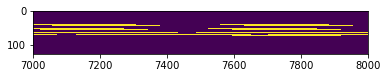

finish


In [5]:
# 4E3 loop 16
# 10G3.5 loop 32
# 9C14.5 loop 32
generate(fir_len=9, start_note='C', sec_len=14.5, octave=2, loop_len=32, velocity=100, sp=0.18)
print("finish")
